In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=12)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

C:\Users\SHALINI\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data = pd.read_csv('UnivBank.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(5000, 14)
['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [4]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 585.9 KB


In [6]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

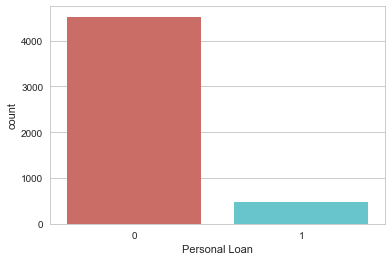

<Figure size 432x288 with 0 Axes>

In [7]:
sns.countplot(x='Personal Loan',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [8]:
data.groupby('Personal Loan').mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2512.165487,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


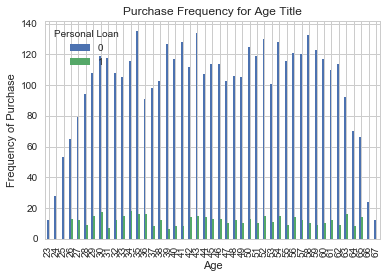

In [16]:
%matplotlib inline
pd.crosstab(data.Age,data['Personal Loan']).plot(kind='bar')
plt.title('Purchase Frequency for Age Title')
plt.xlabel('Age')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

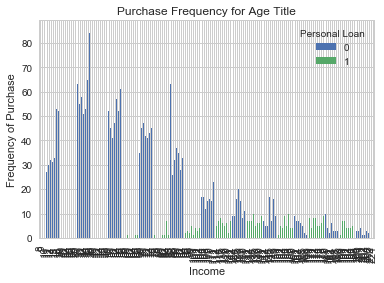

In [18]:
%matplotlib inline
pd.crosstab(data.Income,data['Personal Loan']).plot(kind='bar')
plt.title('Purchase Frequency for Age Title')
plt.xlabel('Income')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

In [9]:
cat_vars=['Education','Securities Account','CD Account','Online','CreditCard']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [10]:
cat_vars=['Education','Securities Account','CD Account','Online','CreditCard']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [11]:
data_final=data[to_keep]
data_final.columns.values

array(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Mortgage', 'Personal Loan', 'Education_1', 'Education_2',
       'Education_3', 'Securities Account_0', 'Securities Account_1',
       'CD Account_0', 'CD Account_1', 'Online_0', 'Online_1',
       'CreditCard_0', 'CreditCard_1'], dtype=object)

In [12]:
data_final_vars=data_final.columns.values.tolist()
y=['Personal Loan']
X=[i for i in data_final_vars if i not in y]

In [14]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(data_final[X], data_final[y] )
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1]


C:\Users\SHALINI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
cols=['Experience','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard'] 
X=data[cols]
y=data['Personal Loan']

In [28]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.142109
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4990
Method:                           MLE   Df Model:                            9
Date:                Sat, 13 Oct 2018   Pseudo R-squ.:                  0.5506
Time:                        10:32:50   Log-Likelihood:                -710.54
converged:                       True   LL-Null:                       -1581.0
                                        LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.4326      0.019    -23.195      0.000      -0.469      -0.396
Exper

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
y_pred = logreg.predict(X_test)

In [31]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


In [32]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.946


In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1352   20]
 [  53   75]]


In [35]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97      1372
          1       0.79      0.59      0.67       128

avg / total       0.95      0.95      0.95      1500



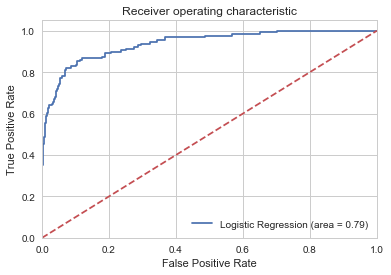

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [38]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,...,Mortgage_617,Mortgage_635,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
0,1,25,1,49,91107,4,1.60,1,0,0,...,0,0,0,1,1,0,1,0,1,0
1,2,45,19,34,90089,3,1.50,1,0,0,...,0,0,0,1,1,0,1,0,1,0
2,3,39,15,11,94720,1,1.00,1,0,0,...,0,0,1,0,1,0,1,0,1,0
3,4,35,9,100,94112,1,2.70,2,0,0,...,0,0,1,0,1,0,1,0,1,0
4,5,35,8,45,91330,4,1.00,2,0,0,...,0,0,1,0,1,0,1,0,0,1
5,6,37,13,29,92121,4,0.40,2,155,0,...,0,0,1,0,1,0,0,1,1,0
6,7,53,27,72,91711,2,1.50,2,0,0,...,0,0,1,0,1,0,0,1,1,0
7,8,50,24,22,93943,1,0.30,3,0,0,...,0,0,1,0,1,0,1,0,0,1
8,9,35,10,81,90089,3,0.60,2,104,0,...,0,0,1,0,1,0,0,1,1,0
9,10,34,9,180,93023,1,8.90,3,0,1,...,0,0,1,0,1,0,1,0,1,0


In [ ]:
data.corr()

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,linewidths=2)

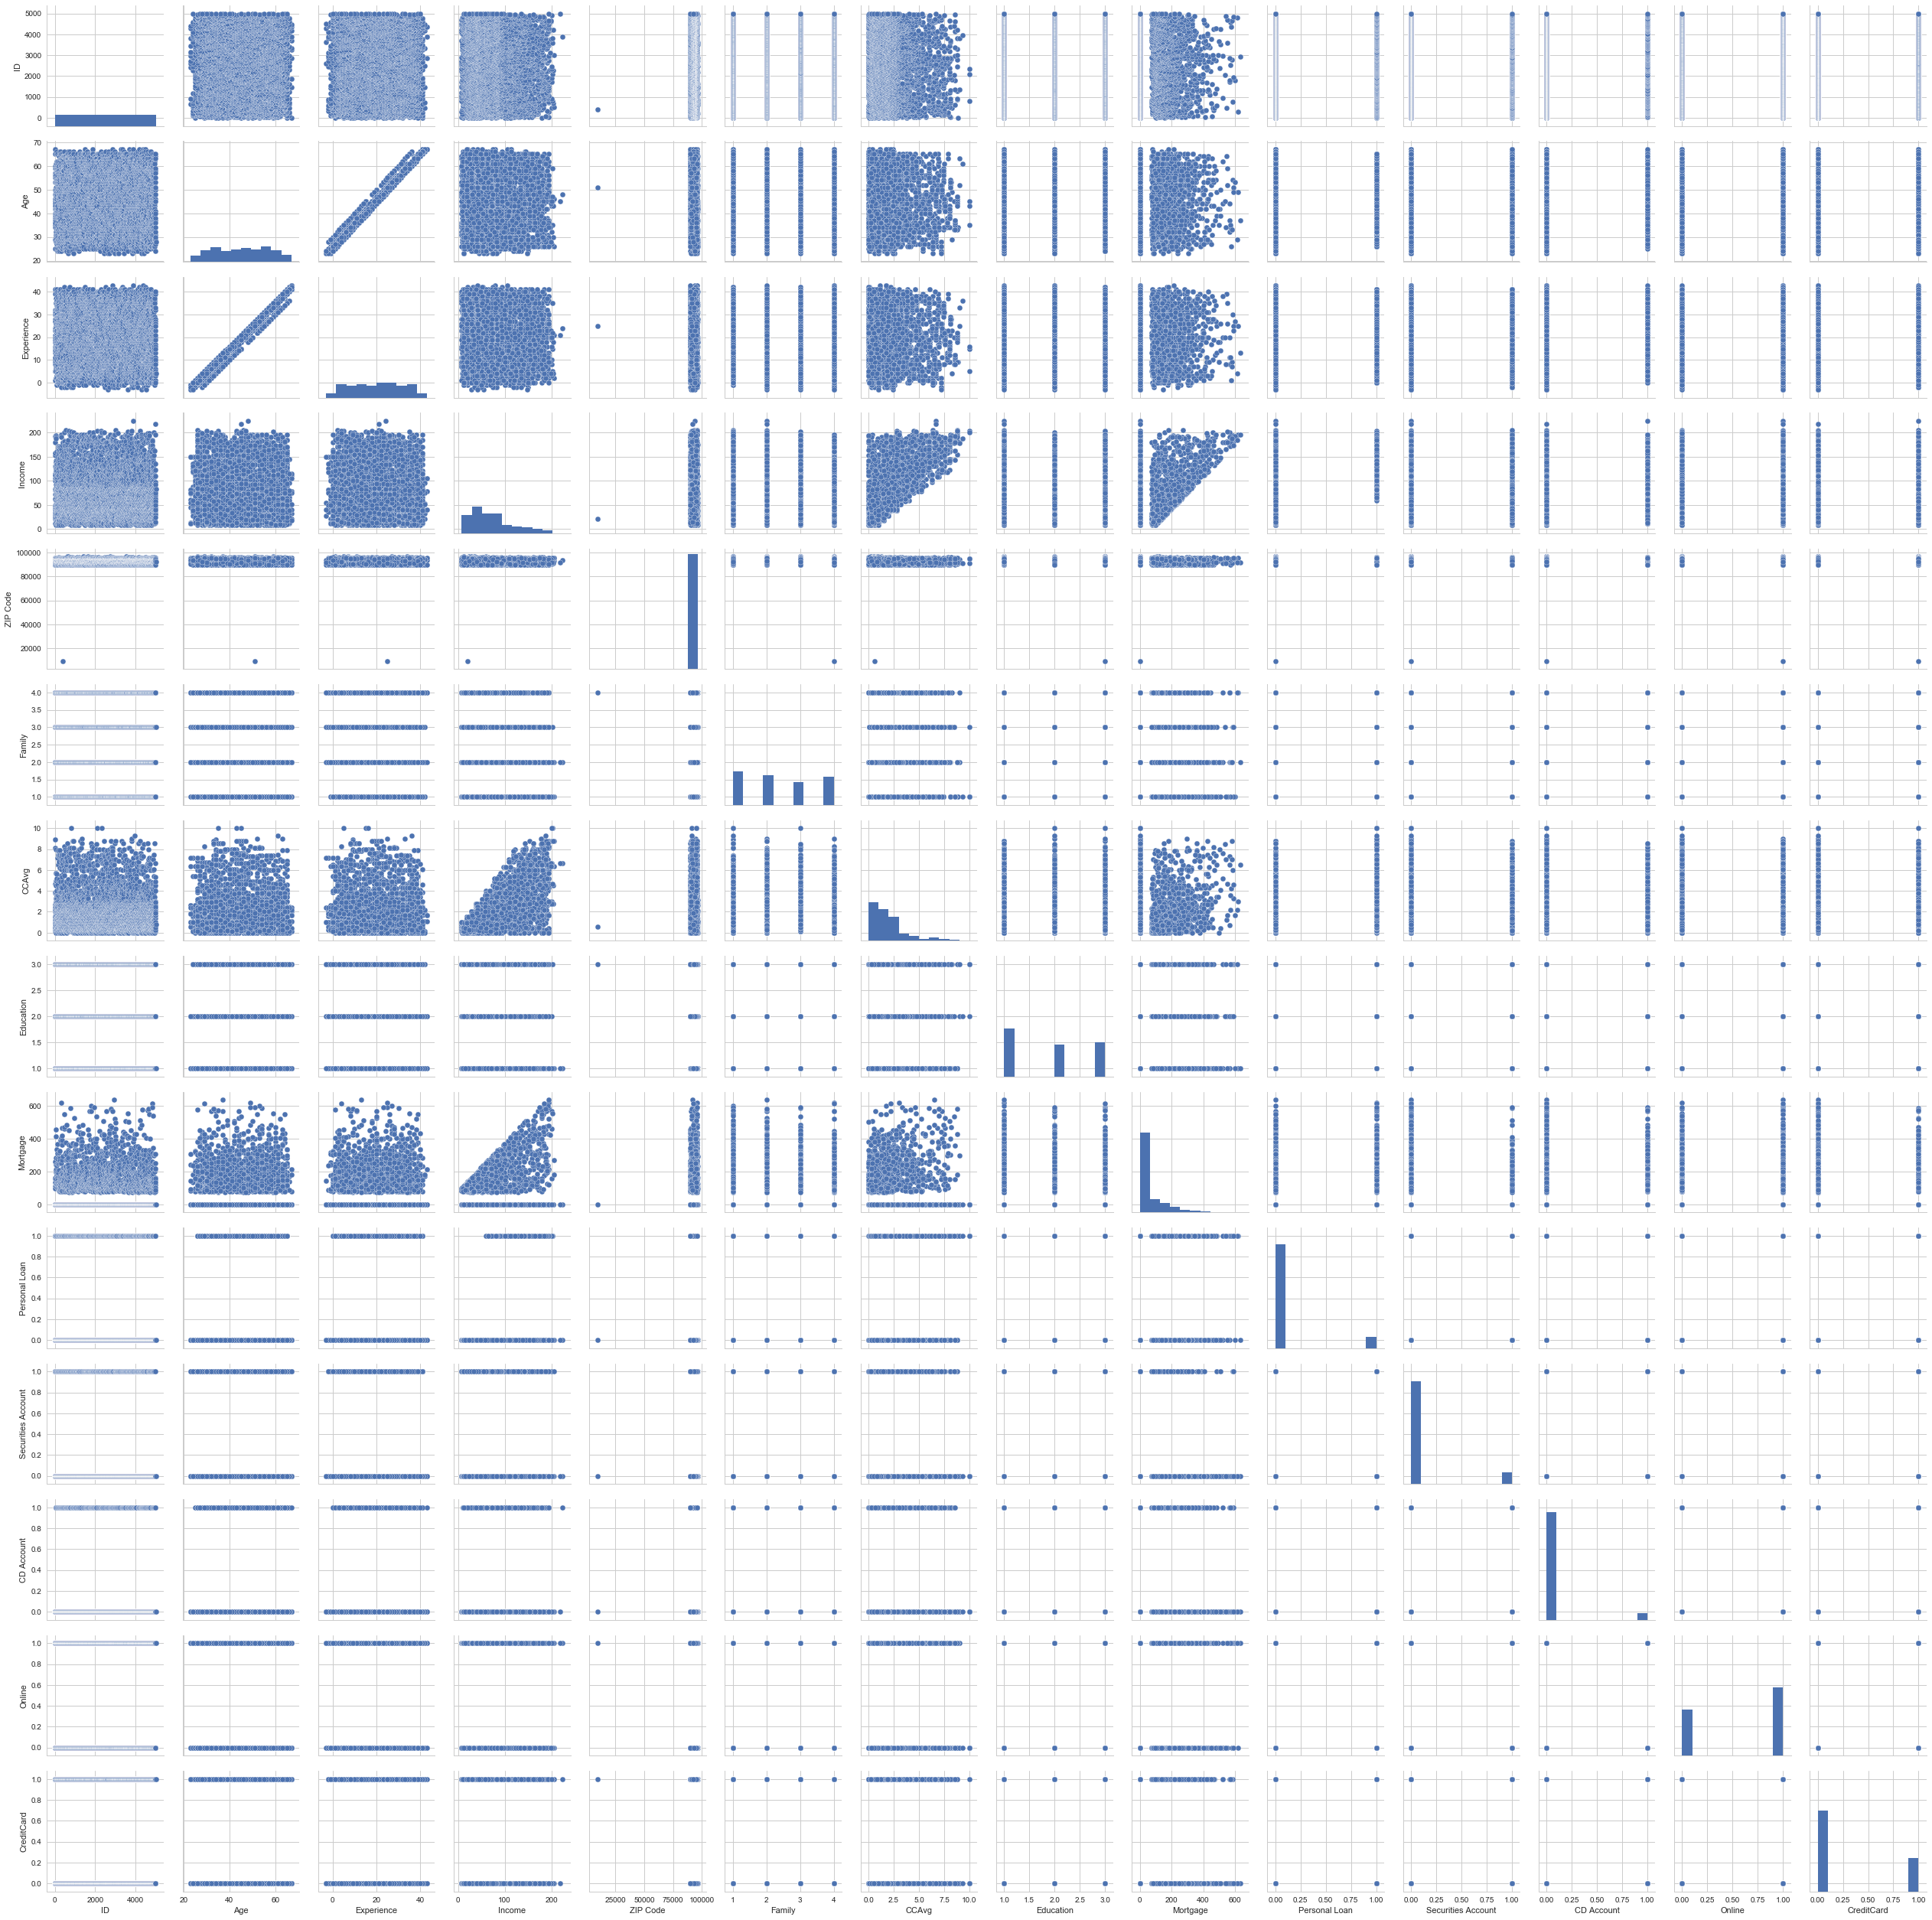

In [17]:
sns.pairplot(data)

In [22]:
#%matplotlib inline
#pd.crosstab(data.Age,data['Personal Loan'])
plt?

In [ ]:
pd.crosstab(data.Age,data['Personal Loan']).plot

In [72]:
cols=['Experience','Family','CCAvg','Education_1','Education_2','CD Account_0','CD Account_1'] 
X=data[cols]
y=data['Personal Loan']

In [73]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.208040
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4993
Method:                           MLE   Df Model:                            6
Date:                Sat, 13 Oct 2018   Pseudo R-squ.:                  0.3421
Time:                        16:34:57   Log-Likelihood:                -1040.2
converged:                       True   LL-Null:                       -1581.0
                                        LLR p-value:                1.957e-230
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Experience       0.0030      0.005      0.575      0.565      -0.007       0.013
Family           0.3079

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
y_pred = logreg.predict(X_test)

In [76]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [77]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.929


In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1353   19]
 [  80   48]]


In [79]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.94      0.99      0.96      1372
          1       0.72      0.38      0.49       128

avg / total       0.92      0.93      0.92      1500



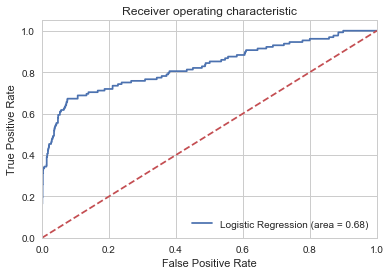

In [81]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()